<center><h2>
<a href="https://masumbhai.me">Kindly visit my portfolio to see more of my works</a>
</h2></center>

In [30]:
import pandas as pd
import numpy as np
from dask import dataframe as dd
from dask.distributed import Client
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
def readCSV_Function(file_path):
    dask_df = dd.read_csv(file_path, blocksize=1e6)
    dask_df = dask_df.repartition(npartitions=8)
    return dask_df.compute(scheduler='threads')

filePath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\Concatenated_Data_Before_Feature_Engineering\\Cleaned_Data.csv"
df = readCSV_Function(filePath)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df = shuffle(df)

<center><h2 style="background:#00FFFF;color:black">
Visualization on Target Feature or "Label" Column
</h2></center>

In [32]:
imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
df["Label"].value_counts()

DrDoS_SSDP       39956
TFTP             39947
DrDoS_UDP        39941
Syn              39919
DrDoS_MSSQL      39627
DrDoS_NTP        39549
DrDoS_SNMP       39353
DrDoS_DNS        38871
UDP-lag          38271
DrDoS_LDAP       28615
DrDoS_NetBIOS    17414
BENIGN            7351
WebDDoS            186
Name: Label, dtype: int64

Here, we noticed that, the amount of Benign & WebDDOS is very much little

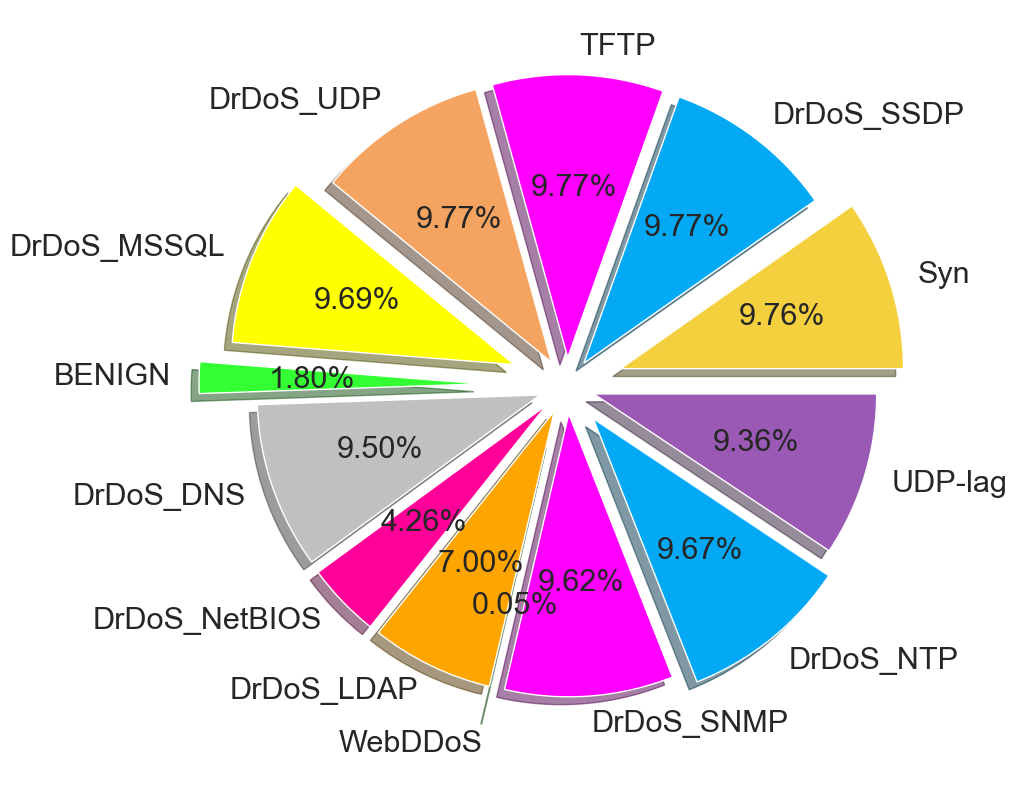

In [33]:
labels = ["Syn","DrDoS_SSDP","TFTP","DrDoS_UDP","DrDoS_MSSQL","BENIGN","DrDoS_DNS","DrDoS_NetBIOS","DrDoS_LDAP","WebDDoS","DrDoS_SNMP","DrDoS_NTP","UDP-lag"]
sizes = [len(df[df["Label"]=="Syn"]),
         len(df[df["Label"]=="DrDoS_SSDP"]),
         len(df[df["Label"]=="TFTP"]),
         len(df[df["Label"]=="DrDoS_UDP"]),
         len(df[df["Label"]=="DrDoS_MSSQL"]),
         len(df[df["Label"]=="BENIGN"]),
         len(df[df["Label"]=="DrDoS_DNS"]),
         len(df[df["Label"]=="DrDoS_NetBIOS"]),
         len(df[df["Label"]=="DrDoS_LDAP"]),
         len(df[df["Label"]=="WebDDoS"]),
         len(df[df["Label"]=="DrDoS_SNMP"]),
         len(df[df["Label"]=="DrDoS_NTP"]),
         len(df[df["Label"]=="UDP-lag"])]
colors = ["#F4D03F",
          "#03A9F4",
          "magenta",
          "#F4A460",
          "yellow",
          "#33FF33",
          "#C0C0C0",
          "#FF0099",
          "orange",
          "#66FF66",
          "#FF00FF",
          "#03A9F4",
          "#9B59B6"]
explodes = (0.2,0.1,0.1,0.1,0.2,0.3,0.1,0.1,0.1,0.2,0.1,0.15,0.1)
# len(labels), len(sizes), len(colors), len(explode)

imgName = "DDOS_Distribution.png"

plt.rcParams.update({"font.size":22})
plt.figure(figsize=(10,10))
plt.pie(sizes,labels=labels,explode=explodes,colors=colors,autopct = '%1.2f%%',shadow=True)
plt.axis('equal')

plt.savefig(imgPath+imgName)
plt.show()

<center><h4 style="background:yellow;color:black">
Now need to find out the prominent features among 78 features<br/>
</center></h4>

#### Flow Packets/s

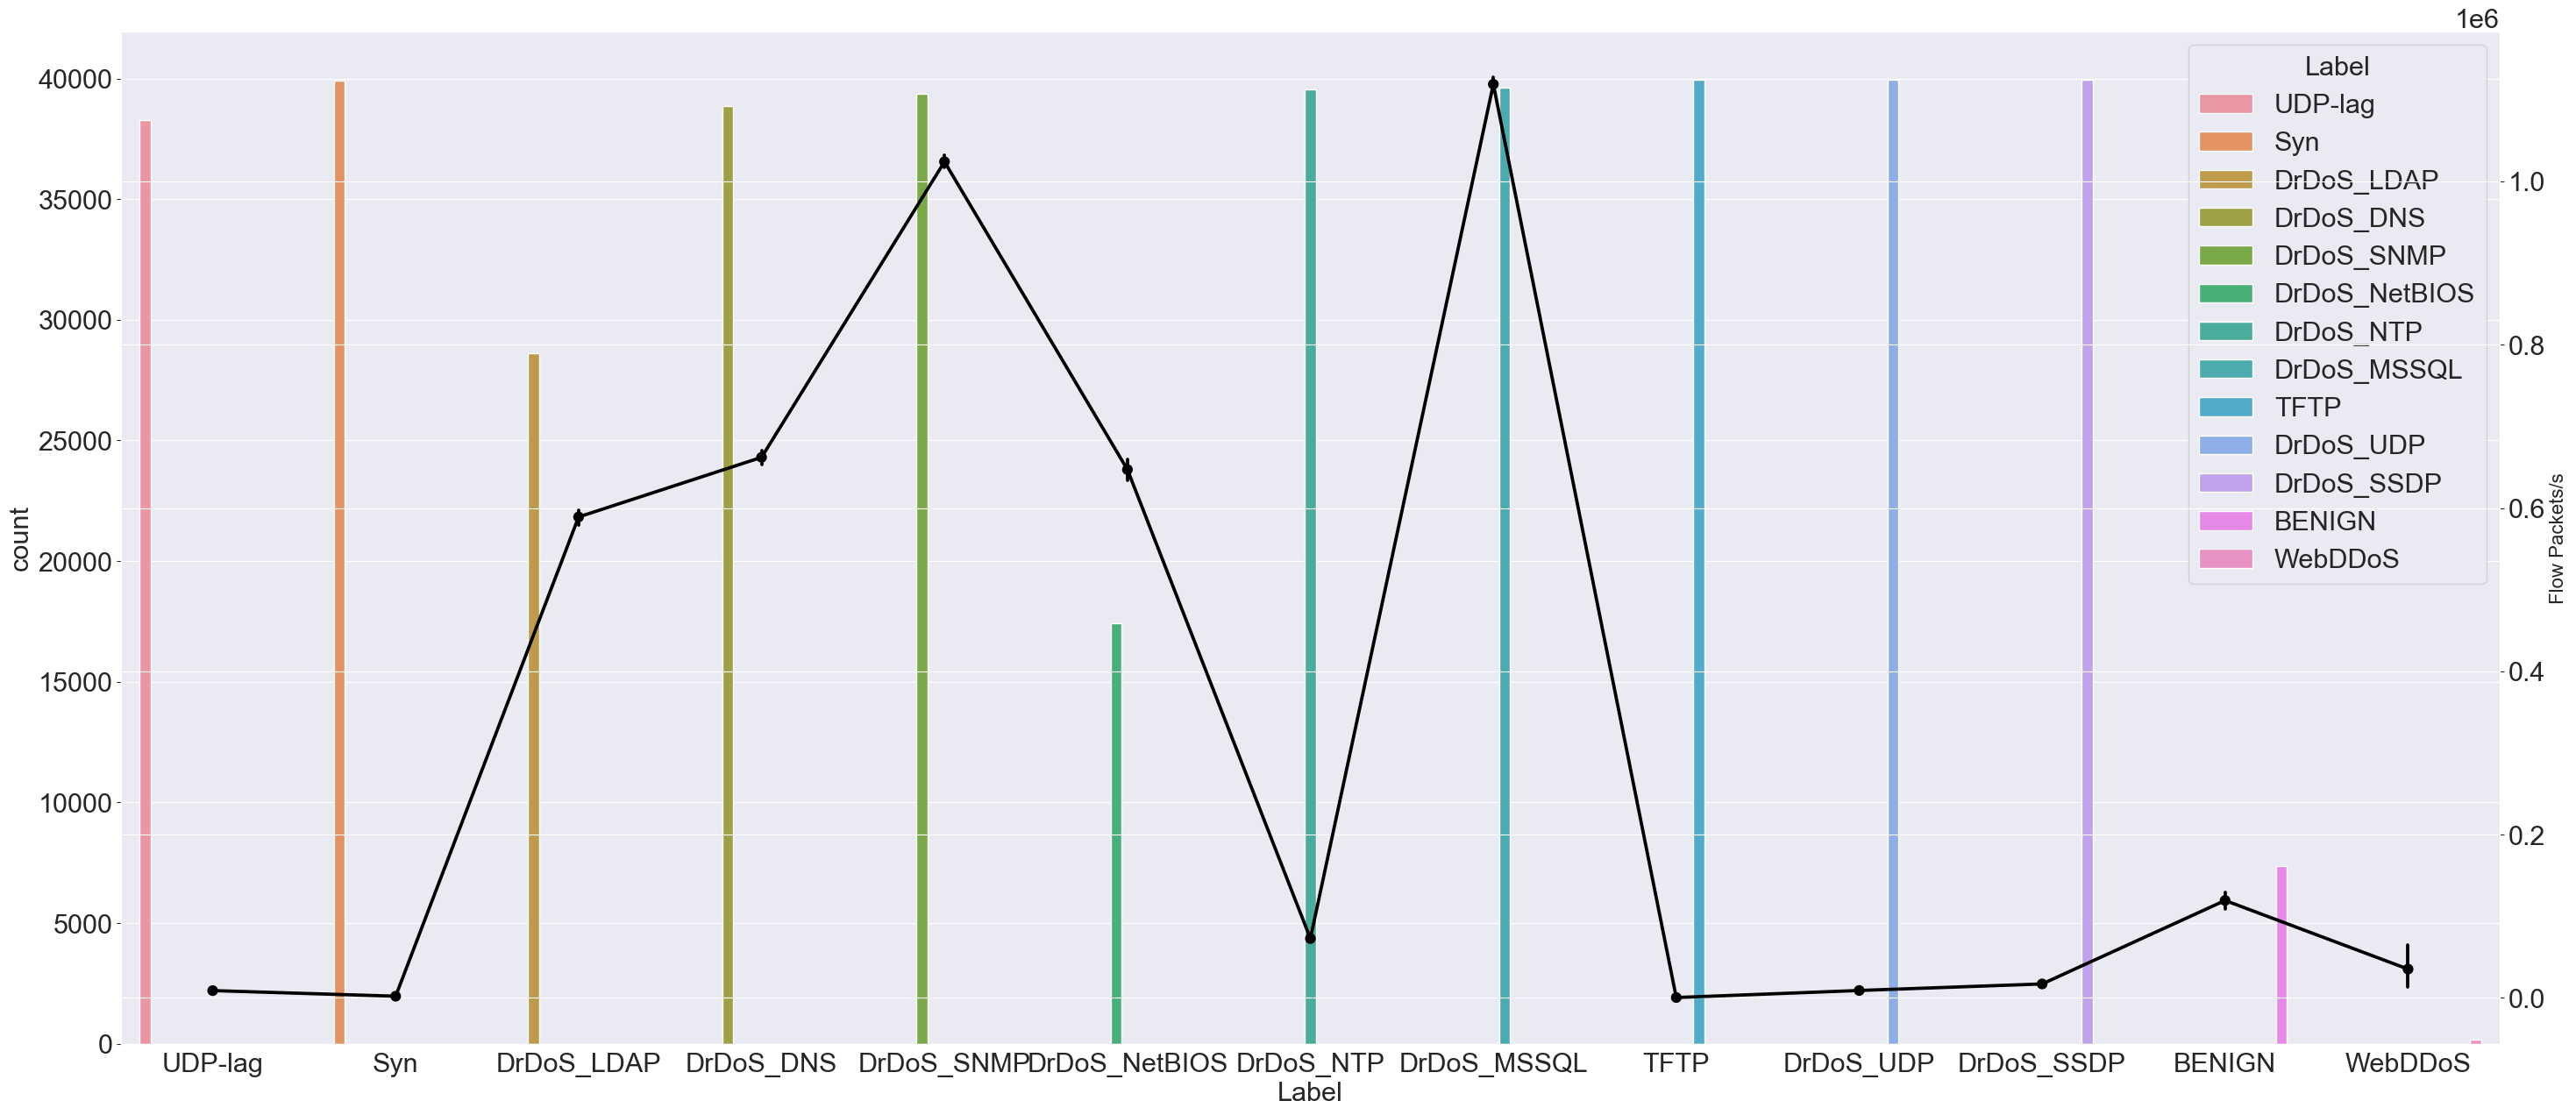

In [34]:
imgName = "Flow_Packets_per_second.png"
plt.figure(figsize=(35,15))
g1 = sns.countplot(x="Label",hue="Label",data=df)
gf1 = g1.twinx()
gf1 = sns.pointplot(x="Label",y="Flow Packets/s",data=df,color="black")
gf1.set_ylabel("Flow Packets/s",fontsize=16)
plt.savefig(imgPath+imgName)

#### Flow Bytes/s

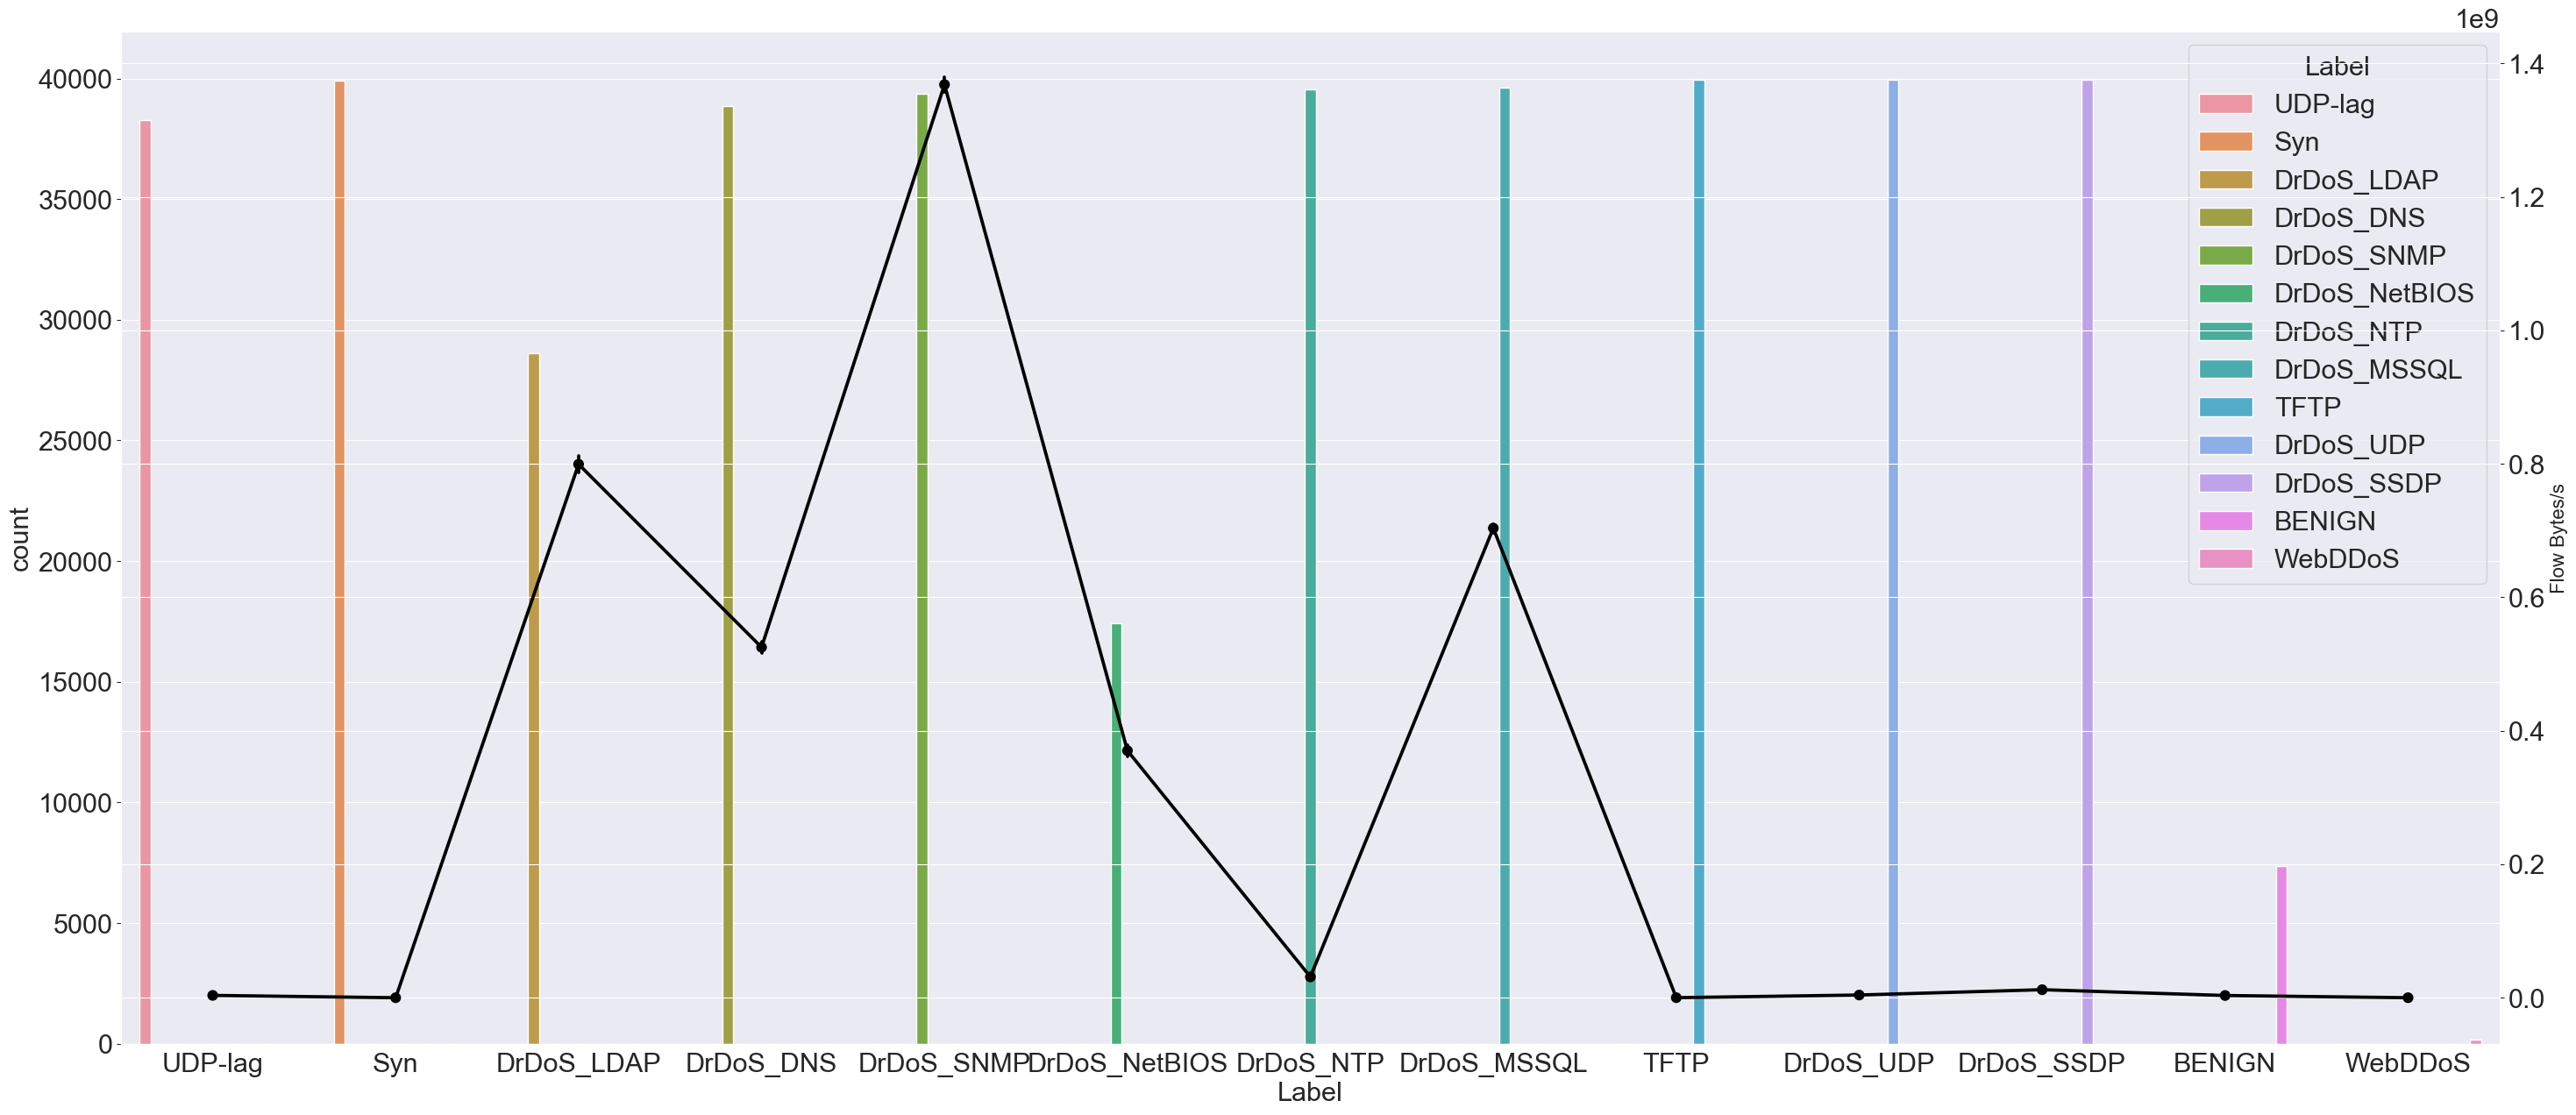

In [35]:
imgName = "Flow_Bytes_per_second.png"
plt.figure(figsize=(35,15))
g1 = sns.countplot(x="Label",hue="Label",data=df)
gf2 = g1.twinx()
gf2 = sns.pointplot(x="Label",y="Flow Bytes/s",data=df,color="black")
gf2.set_ylabel("Flow Bytes/s",fontsize=16)
plt.savefig(imgPath+imgName)

#### Protocols {Hop-to-Hop, TCP, UDP}

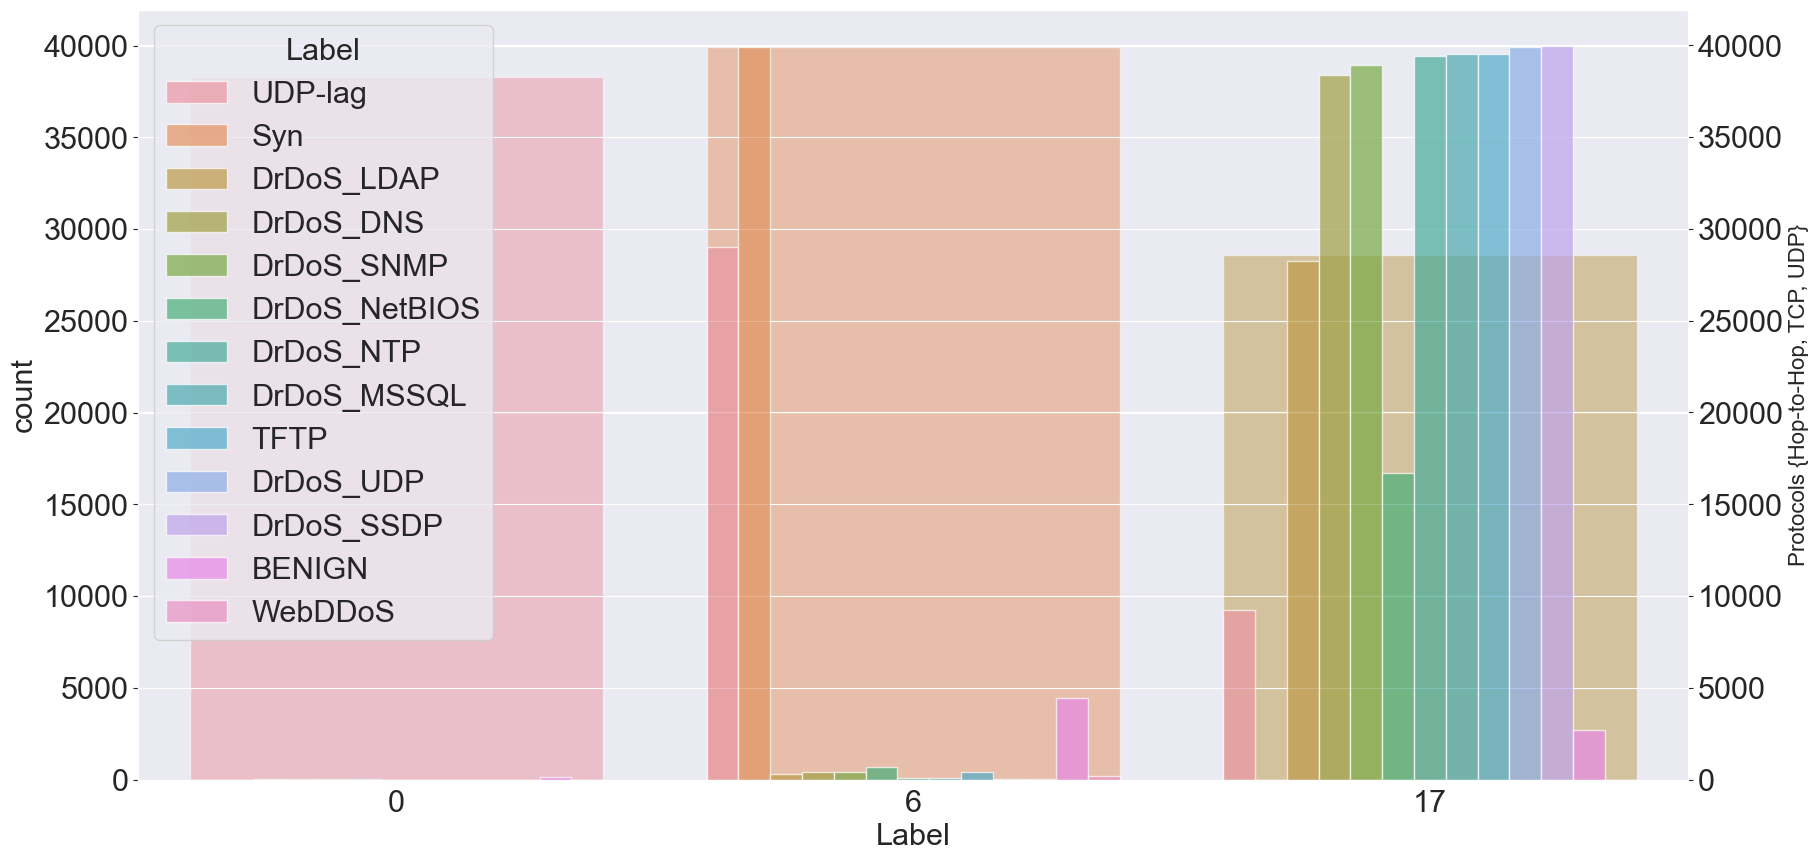

In [36]:
imgName = "protocols.png"
plt.figure(figsize=(20,10))
g1 = sns.countplot(x="Label",data=df,alpha=0.5)
gf2 = g1.twinx()
gf2 = sns.countplot(x="Protocol",hue="Label",data=df,alpha=0.7)
gf2.set_ylabel("Protocols {Hop-to-Hop, TCP, UDP}",fontsize=16)
plt.savefig(imgPath+imgName)

#### Fwd IAT Total vs Bwd IAT Total

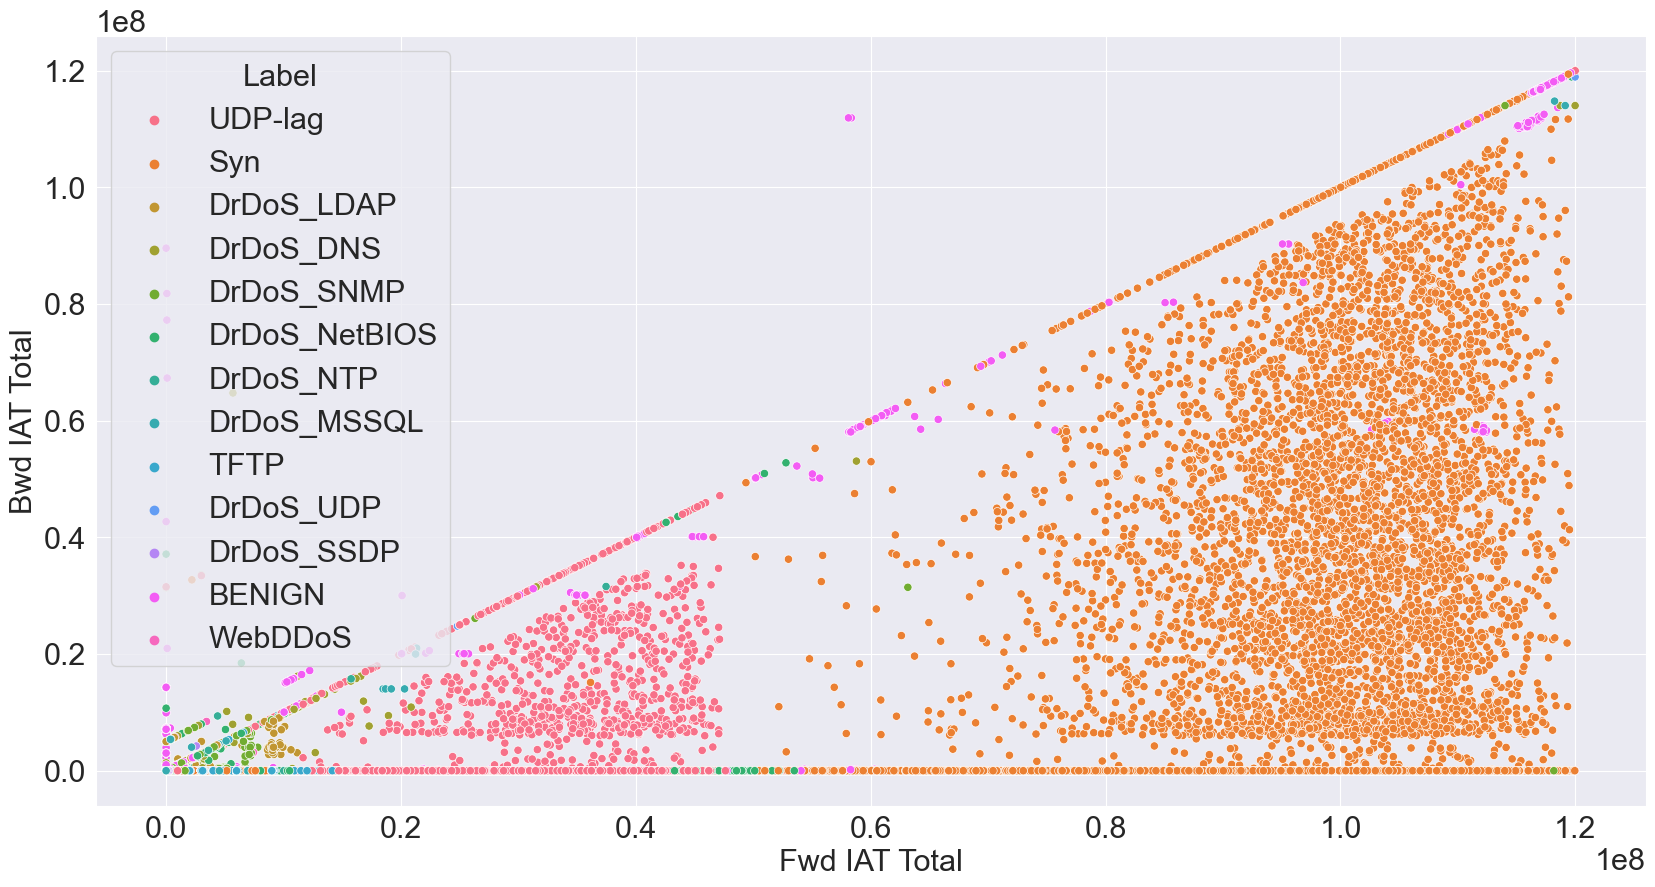

In [37]:
imgName = "Fwd IAT Total vs Bwd IAT Total.png"
plt.figure(figsize=(20,10))
sns.scatterplot(x='Fwd IAT Total', y='Bwd IAT Total', hue='Label', data=df)
plt.savefig(imgPath+imgName)

#### Co-relation matrix

In [38]:
# f = plt.figure(figsize=(20,15))
# plt.matshow(df.corr(),fignum=f.number)
# plt.xticks(range(df.shape[1]),df.columns,fontsize=10,rotation=90)
# plt.yticks(range(df.shape[1]),df.columns,fontsize=10)
# cov_plt = plt.colorbar()
# cov_plt.ax.tick_params(labelsize=14)

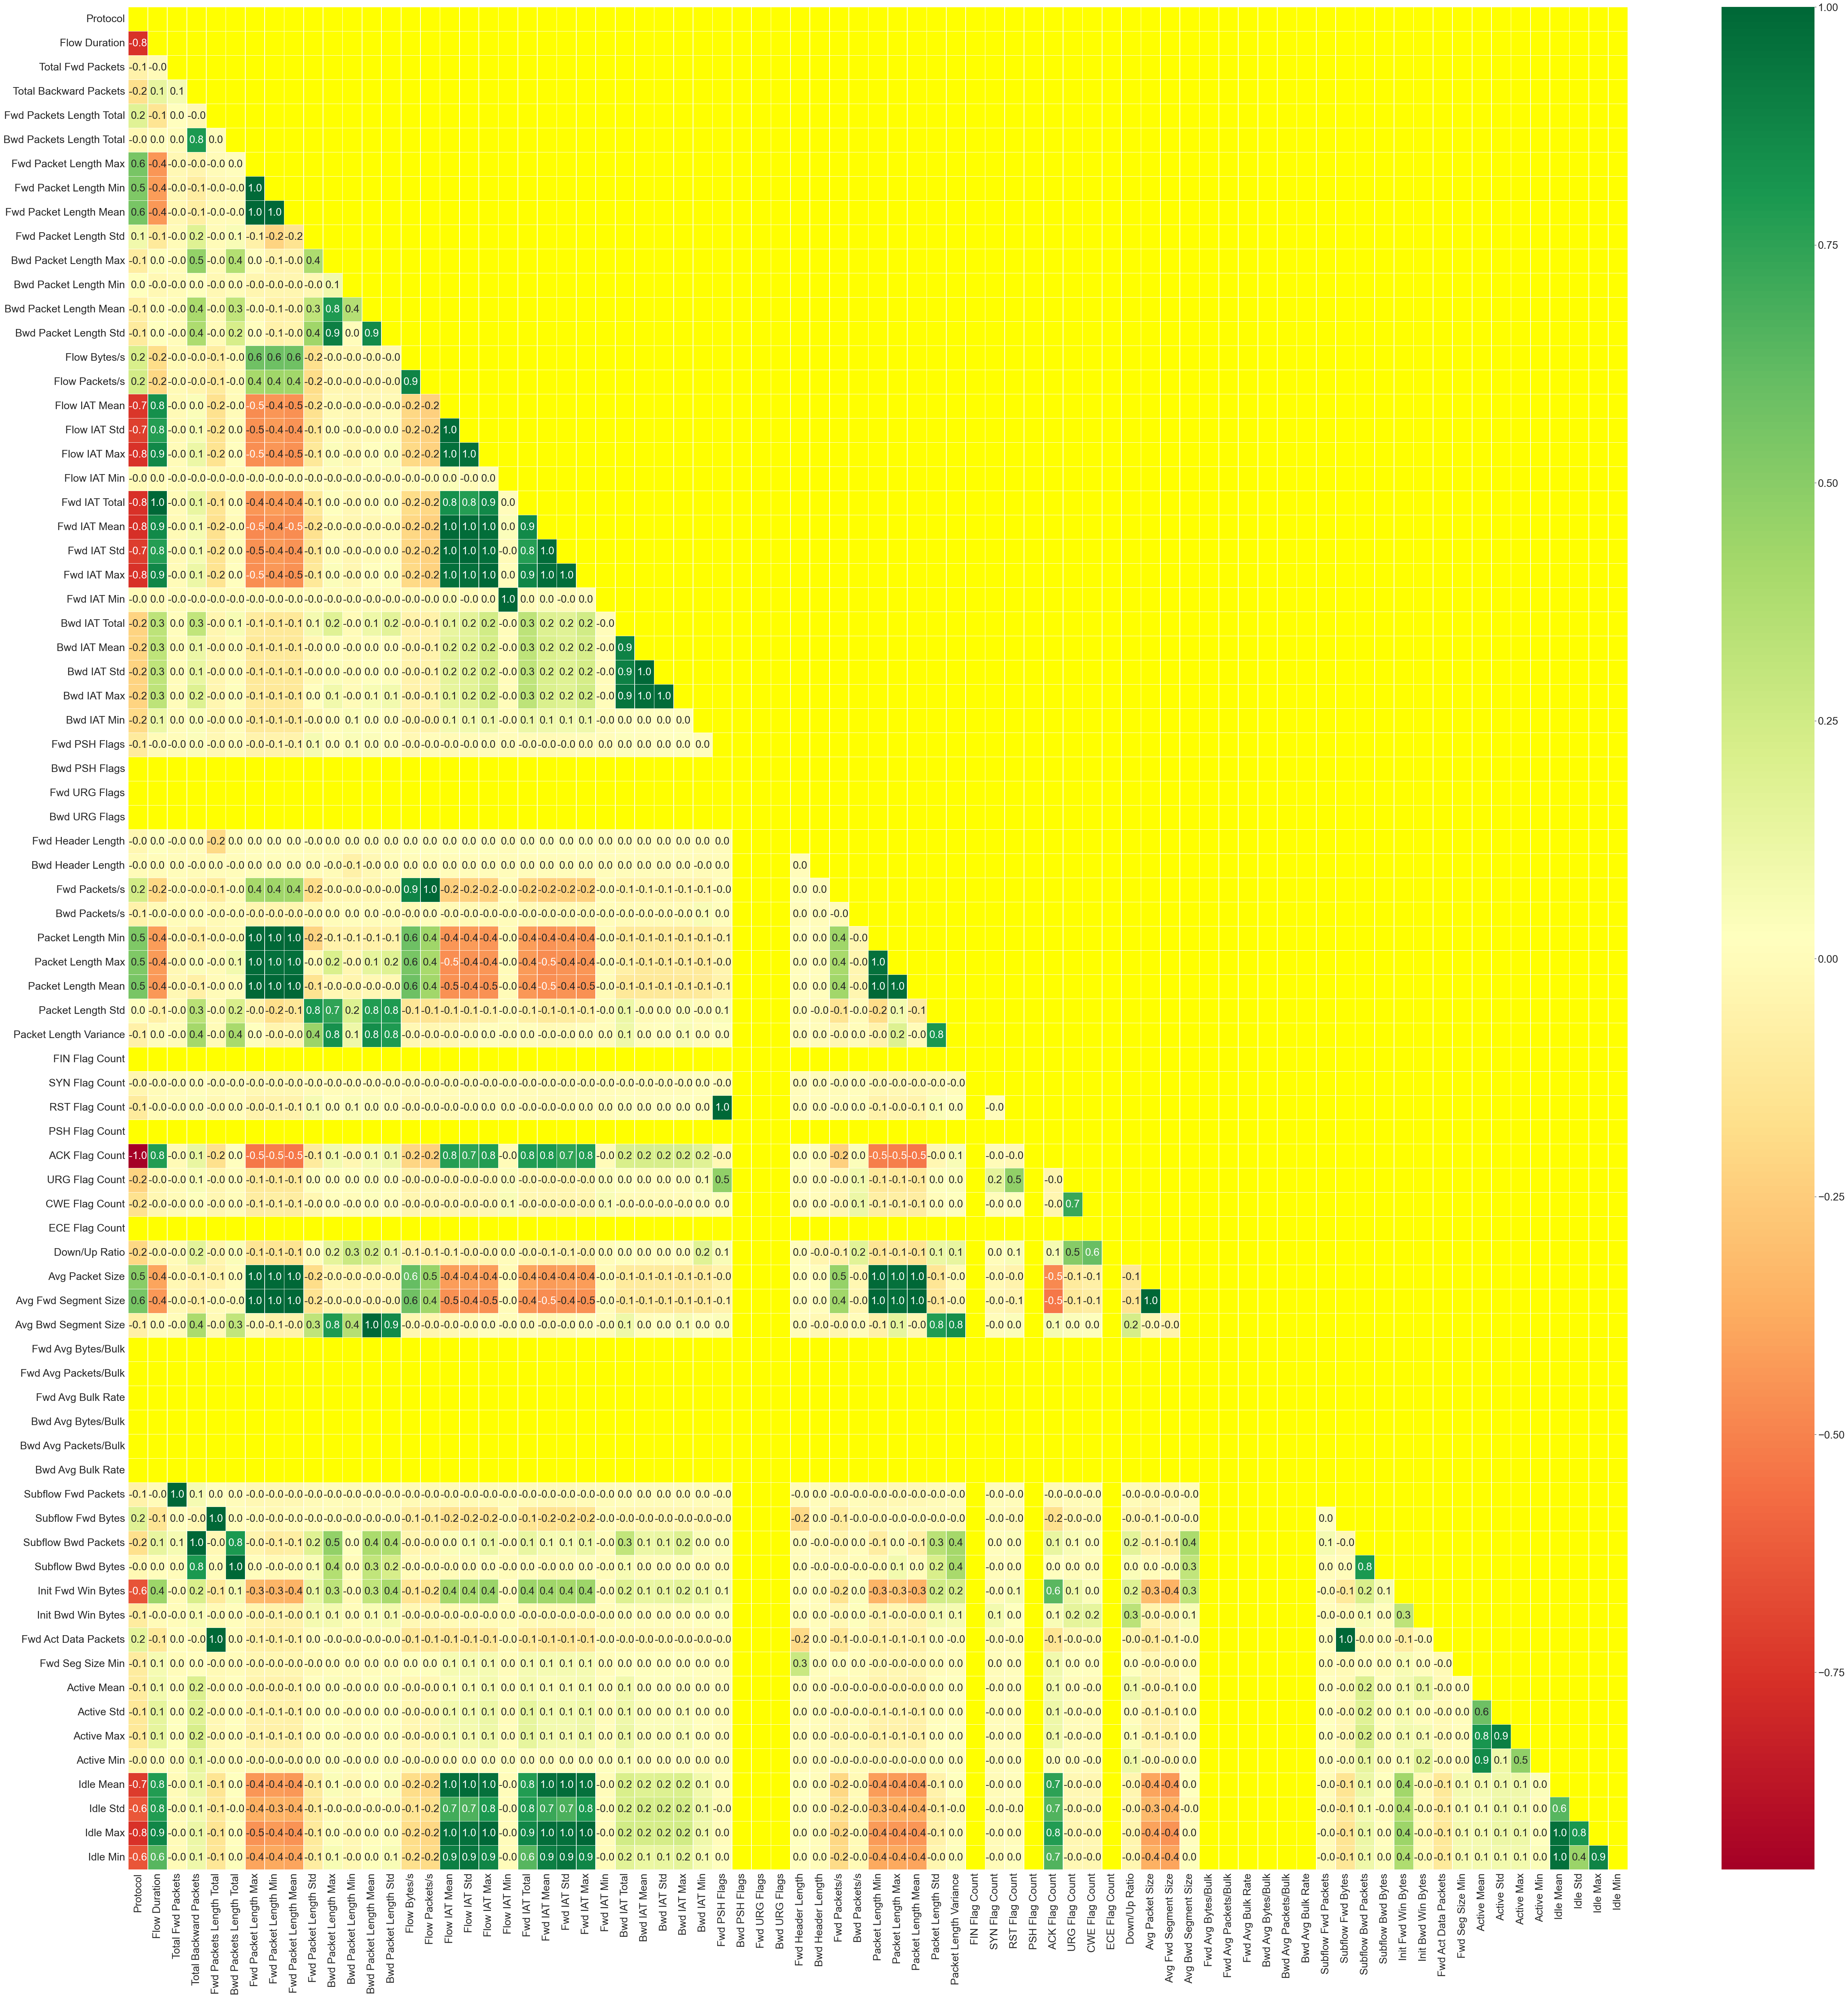

In [39]:
imgName = "78_Features_co-relations.png"
f, ax = plt.subplots(figsize=(70, 70))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
# generating color for bad values in heatmap
color = plt.get_cmap('RdYlGn')   # default color
color.set_bad('yellow')

sns.heatmap(data=df.corr(), annot=True,mask = mask, linewidths=.5, fmt='.1f', ax=ax,cmap=color)
plt.savefig(imgPath+imgName, dpi=400)

#### Here, we observe that some features giving bad values(yellow colors) for co-relations, so need to omit those features.

#### After dropping those unique value containing features

In [43]:
filePath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Column_Data_Cleaning\\after_dropping_unique_data_containing_features.csv"
df2 = readCSV_Function(filePath)
df2.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df2 = shuffle(df2)

df2.shape

(409000, 66)

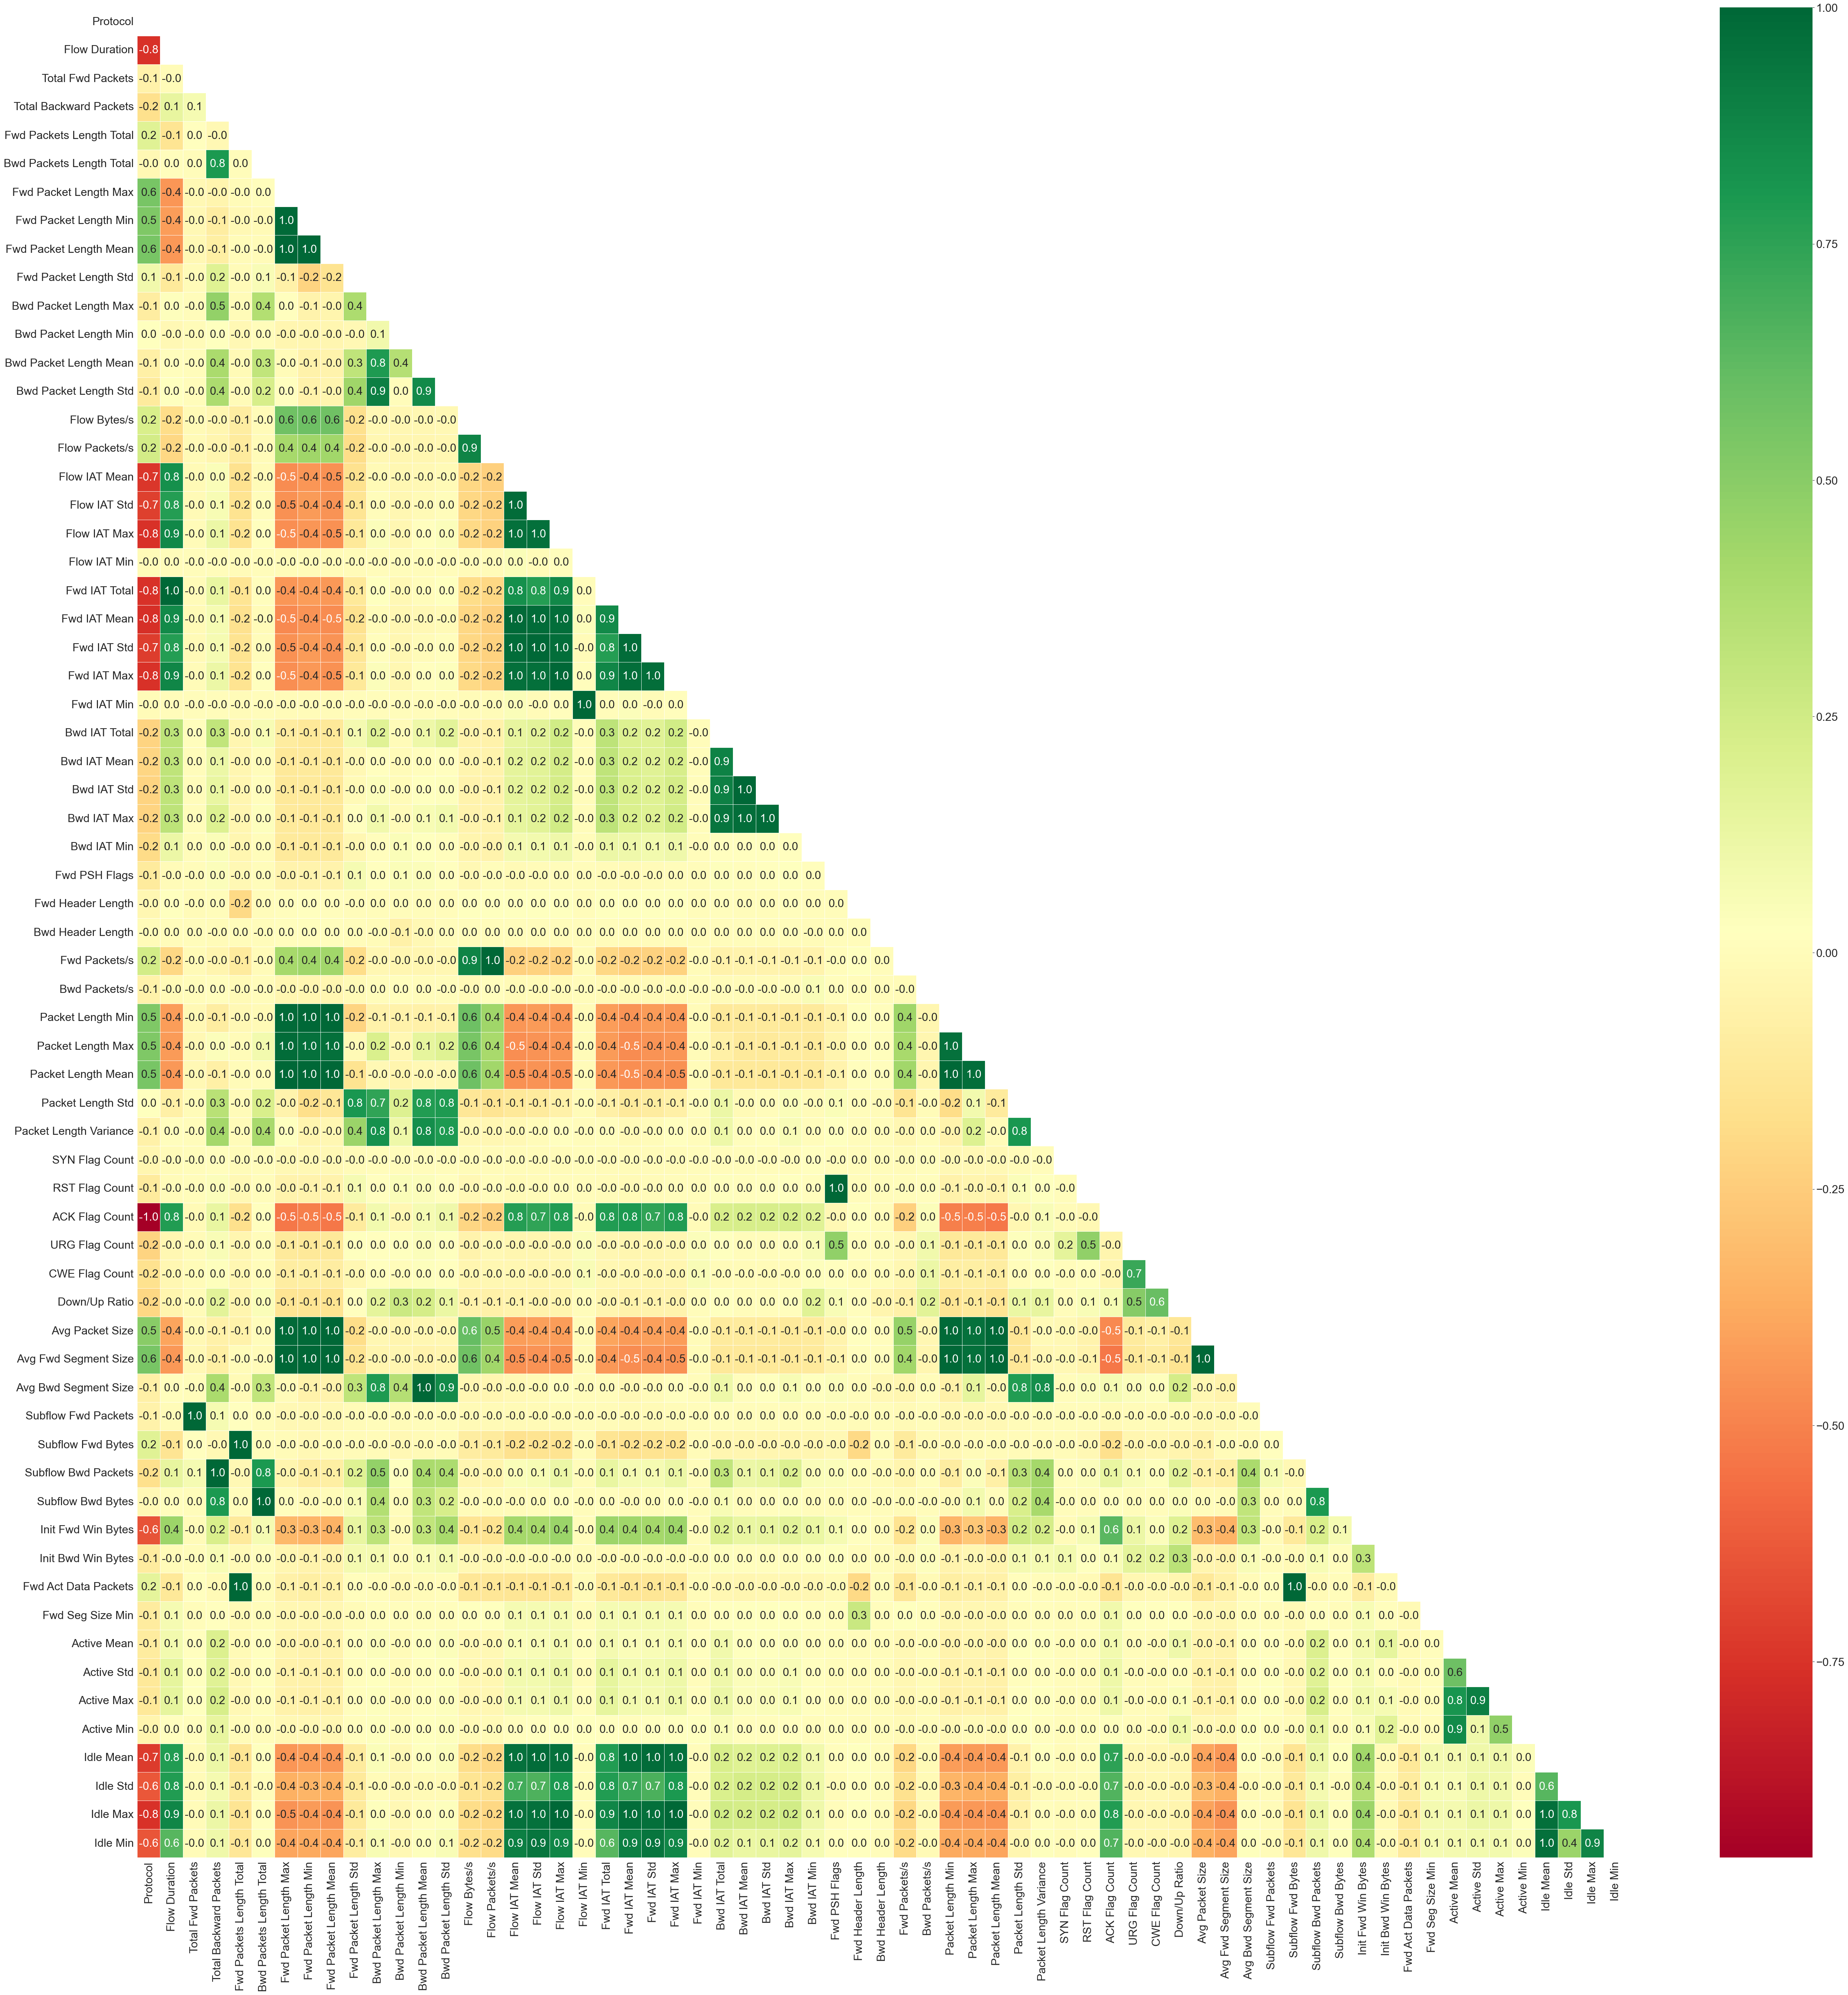

In [44]:
imgName = "66_Features_co-relations.png"
f, ax = plt.subplots(figsize=(65, 65))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(df2.corr(), dtype=bool))
# generating color for bad values in heatmap
color = plt.get_cmap('RdYlGn')   # default color
color.set_bad('white')

sns.heatmap(data=df2.corr(), annot=True,mask = mask, linewidths=.5, fmt='.1f', ax=ax,cmap=color)
plt.savefig(imgPath+imgName, dpi=400)

#### Here, we observe that generated heatmap still have some callous data, so need to omit those features using PCA.
#### But Before that, we need to identify those co-related pairs using Pearson threshold

In [46]:
fwd_cols = [col for col in df2.columns if 'Fwd' in col]
len(fwd_cols)

20